### Ejercicio de regresión lineal
* Conjunto de datos: [Precios de casas de California](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

##### Preparación

In [1]:
# Importar librerías de análisis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definir un tema para graficar
sns.set_style('whitegrid')

In [3]:
# Suprimir alertas futuras
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##### Preprocesamiento

In [4]:
# Abrir el archivo
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.shape, y.shape

((20640, 8), (20640,))

In [5]:
# Concatenar las características
df = pd.concat([X, y], axis=1)
df.shape

(20640, 9)

In [6]:
# Ver las primeras filas
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
# Ver la información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# Contar el número de valores nulos por variable
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

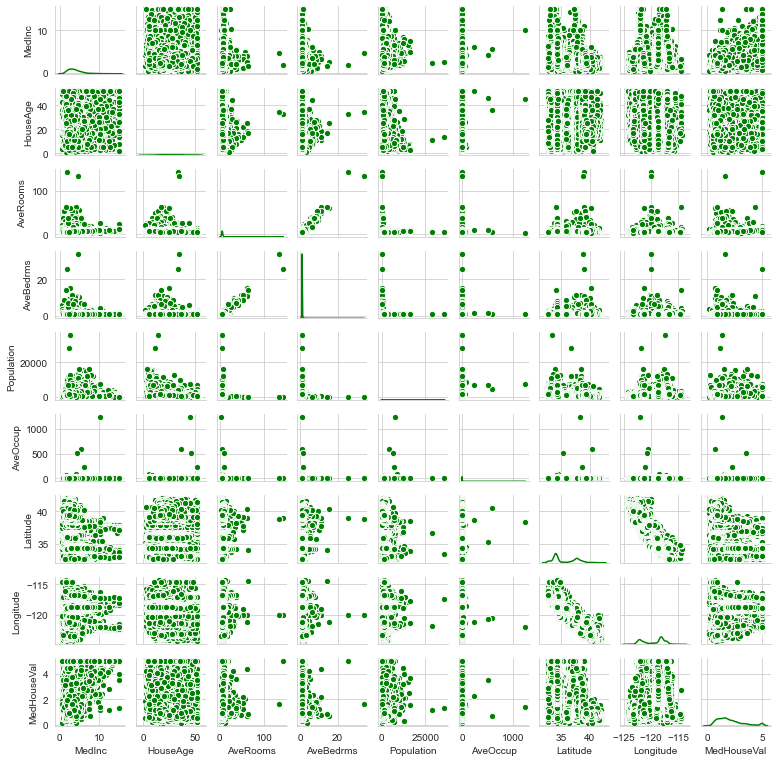

In [9]:
# Dibujar un gráfico de pares
g = sns.PairGrid(df, height=1.2)
g = g.map_diag(sns.kdeplot, color='green')
g = g.map_offdiag(plt.scatter, edgecolor='w', s=40, color='green')
plt.show();

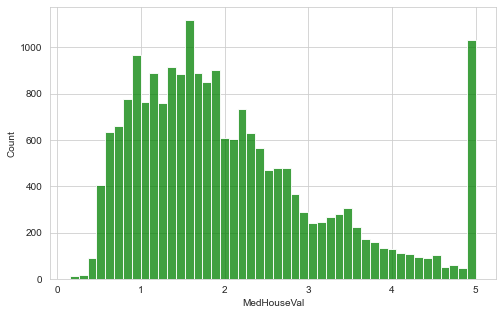

In [10]:
# Graficar la variable 
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(x='MedHouseVal', data=df, color='green',ax=ax);

In [11]:
# Crear la matriz de correlación
cor_matrix = df.corr()

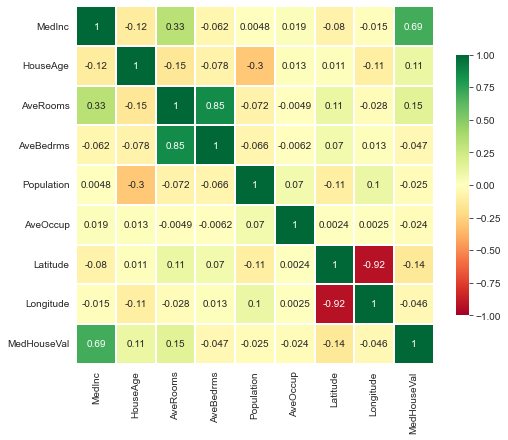

In [12]:
# Graficar la matriz de correlación
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=cor_matrix, linewidths=0.3, square=True, cmap='RdYlGn', annot=True, vmax=1, vmin=-1, center=0, cbar_kws={'shrink': 0.6}, ax=ax)
plt.show()

In [13]:
# Listar las columnas más correladas
cor_matrix = cor_matrix.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)

['AveBedrms', 'Longitude']


In [14]:
# Eliminar las columnas correlacionadas
df = df.drop(to_drop, axis=1)

In [15]:
# Separar en características (X) y etiquetas (Y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [16]:
# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape[0], X_test.shape[0]

(15480, 5160)

In [17]:
# Definir función para escalar
from sklearn.preprocessing import MinMaxScaler

def NormScaler(train_set, test_set):
    scaler = MinMaxScaler().fit(train_set)
    train_set_norm = pd.DataFrame(scaler.transform(train_set), columns=train_set.columns)
    test_set_norm = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)
    return train_set_norm, test_set_norm

In [18]:
# Estandarizar l##### Ajustar el modelo de árbol de decisiónos conjuntos
X_train_norm, X_test_norm = NormScaler(X_train, X_test)

##### Ajustar el modelo de regresión lineal

In [19]:
# Entrenar el modelo con "sklearn"
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train_norm, y_train)

LinearRegression()

In [20]:
# Guardar los coeficientes
coef = pd.DataFrame(zip(X.columns, np.transpose(reg.coef_)), columns=['features', 'coef'])
print('Intercepto: ', round(reg.intercept_, 6))
coef.sort_values(by='coef')

Intercepto:  0.326446


,features,coef
4,AveOccup,-6.765472
2,AveRooms,-3.628489
5,Latitude,-0.403310
3,Population,0.691488
1,HouseAge,0.913944
0,MedInc,6.423472


In [21]:
# Evaluar el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test_norm)
print('MAE: %.2f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.2f' % (mean_squared_error(y_test, y_pred)))
print('R2: %.2f' % (r2_score(y_test, y_pred)))

MAE: 0.60
MSE: 0.70
R2: 0.48


In [22]:
# Entrenar el modelo con "statsmodels"
import statsmodels.api as sm 

X_train = sm.add_constant(X_train) 
reg = sm.OLS(y_train, X_train).fit()

In [24]:
# Imprimir el resumen del modelo
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     2894.
Date:                Sun, 28 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:22:10   Log-Likelihood:                -18334.
No. Observations:               15480   AIC:                         3.668e+04
Df Residuals:                   15473   BIC:                         3.674e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5159      0.113     13.470      0.0

In [25]:
# Guardar los coeficientes
coef = pd.DataFrame(zip(X_train.columns, np.transpose(reg._results.params)), columns=['features', 'coef'])
coef.sort_values(by='coef')

,features,coef
6,Latitude,-0.042905
3,AveRooms,-0.027563
5,AveOccup,-0.011294
4,Population,0.000024
2,HouseAge,0.017920
1,MedInc,0.442992
0,const,1.515890


In [26]:
# Evaluar el modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)
print('MAE: %.2f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.2f' % (mean_squared_error(y_test, y_pred)))
print('R2: %.2f' % (r2_score(y_test, y_pred)))

MAE: 0.60
MSE: 0.70
R2: 0.48


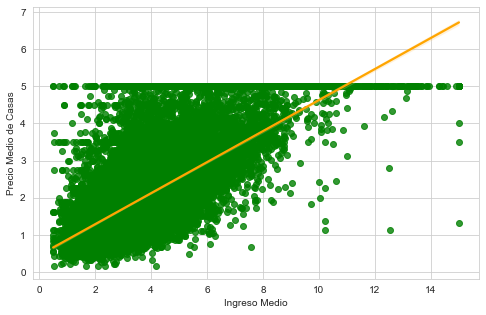

In [27]:
# Graficar la curva de regresión de un coeficiente
fig, ax = plt.subplots(figsize=(8, 5))
sns.regplot(x='MedInc', y='MedHouseVal', data=df, ax=ax, scatter_kws={'color': 'green'}, line_kws={'color': 'orange'})
ax.set_xlabel('Ingreso Medio')
ax.set_ylabel('Precio Medio de Casas');